In [2]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt

In [3]:
label_path = './input/labels.csv'
image_path = './input/head_ct/head_ct'

label_df = pd.read_csv(label_path)
image_files = sorted(glob.glob(image_path + '/*.png'))

In [4]:
labels = np.array(label_df[' hemorrhage'].tolist())
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [5]:
images = np.array([cv2.imread(file) for file in image_files])
images=np.array([cv2.resize(image, (128, 128)) for image in images])

/home/ubuntu/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [6]:
images[0].shape

(128, 128, 3)

In [14]:
X_dev, X_val, Y_dev, Y_val = train_test_split(images, labels, test_size=0.3, shuffle=True, random_state=2019)

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [16]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, Activation,GlobalAveragePooling2D, GlobalMaxPooling2D,AveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
import math

In [31]:
def simple_conv_model(input_shape):
#     model = Sequential()input_shape

#     model.add(Conv2D(filters=6, kernel_size=5, activation='sigmoid',
#                                padding='same', input_shape=input_shape))
#     model.add(AveragePooling2D(pool_size=2, strides=2))
#     model.add(Conv2D(filters=16, kernel_size=5,
#                                activation='sigmoid'))
#     model.add(AveragePooling2D(pool_size=2, strides=2))
#     model.add(Flatten())
#     model.add(Dense(120, activation='sigmoid'))
#     model.add(Dense(84, activation='sigmoid'))
#     model.add(Dense(2))
    model = keras.models.Sequential([
        # layer 1
        layers.Conv2D(
            filters=96,
            kernel_size=(11, 11),
            strides=(4, 4),
            activation=keras.activations.relu,
            padding='valid',
            input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

        # layer 2
        layers.Conv2D(
            filters=256,
            kernel_size=(5, 5),
            strides=(1, 1),
            activation=keras.activations.relu,
            padding='same'
        ),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

        # layer 3
        layers.Conv2D(
            filters=384,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation=keras.activations.relu,
            padding='same'
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            filters=384,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation=keras.activations.relu,
            padding='same'
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            filters=384,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation=keras.activations.relu,
            padding='same'
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            filters=384,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation=keras.activations.relu,
            padding='same'
        ),
        layers.BatchNormalization(),

        # layer 4
        layers.Conv2D(
            filters=384,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation=keras.activations.relu,
            padding='same'
        ),
        layers.BatchNormalization(),

        # layer 5
        layers.Conv2D(
            filters=256,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation=keras.activations.relu,
            padding='same'
        ),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

        # layer 6
        layers.Flatten(),
        layers.Dense(units=4096, activation=keras.activations.relu),
        layers.Dropout(rate=0.5),

        # layer 7
        layers.Dense(units=4096, activation=keras.activations.relu),
        layers.Dropout(rate=0.5),

        # layer 8
        layers.Dense(units=2, activation=keras.activations.softmax)
    ])

    return model

In [32]:
model = simple_conv_model((128, 128, 3))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 30, 30, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 14, 14, 256)      1024      
 chNormalization)                                                
                                                      

In [34]:
hist = model.fit(X_dev, Y_dev,
                 steps_per_epoch=6,
                 batch_size=10,
                 shuffle=True,
                 epochs=500,
                 validation_split=0.2,
                 callbacks=[ModelCheckpoint("weights.h5", monitor='val_accuracy', save_best_only=True, mode='max')])

Epoch 1/500
6/6 [==============================] - 3s 152ms/step - loss: 52.5497 - accuracy: 0.5167 - val_loss: 7841.2686 - val_accuracy: 0.5000
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 9.1511 - accuracy: 0.6923 - val_loss: 98.5380 - val_accuracy: 0.5000
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 5.4661 - accuracy: 0.5167 - val_loss: 74.7415 - val_accuracy: 0.5000
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 1.9657 - accuracy: 0.5769 - val_loss: 61.7120 - val_accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 1.3470 - accuracy: 0.6500 - val_loss: 104.8356 - val_accuracy: 0.5000
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 1.5540 - accuracy: 0.5769 - val_loss: 123.8860 - val_accuracy: 0.5000
Epoch 7/500
6/6 [==============================] - 0s 11ms/step - loss: 2.0662 - accuracy: 0.6500 - val_loss: 675.7241 - val_accuracy: 0.5000
Epoch 

In [35]:
model.load_weights("weights.h5")

In [36]:
def check_accuracy(model, setX, actual, print_images=True):
    predicted = np.array([int(x[0] > 0.5) for x in model.predict(setX)])
    if print_images:
        rows = math.ceil(len(predicted) / 10.)
        plt.figure(figsize=(20, 3 * rows))
        for i in range(len(predicted)):
            plt.subplot(rows, 10, i + 1)
            plt.imshow(setX[i])
            plt.title("pred " + str(predicted[i]) + " actual " + str(actual[i]))

    confusion = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = confusion.ravel()
    print("True positive:", tp, ", True negative:", tn,
          ", False positive:", fp, ", False negative:", fn)

    print("Total accuracy:", np.sum(predicted == actual) / len(predicted) * 100., "%")
    return (tn, fp, fn, tp)

5/5 [==============================] - 0s 14ms/step
True positive: 67 , True negative: 0 , False positive: 73 , False negative: 0
Total accuracy: 47.85714285714286 %


(0, 73, 0, 67)

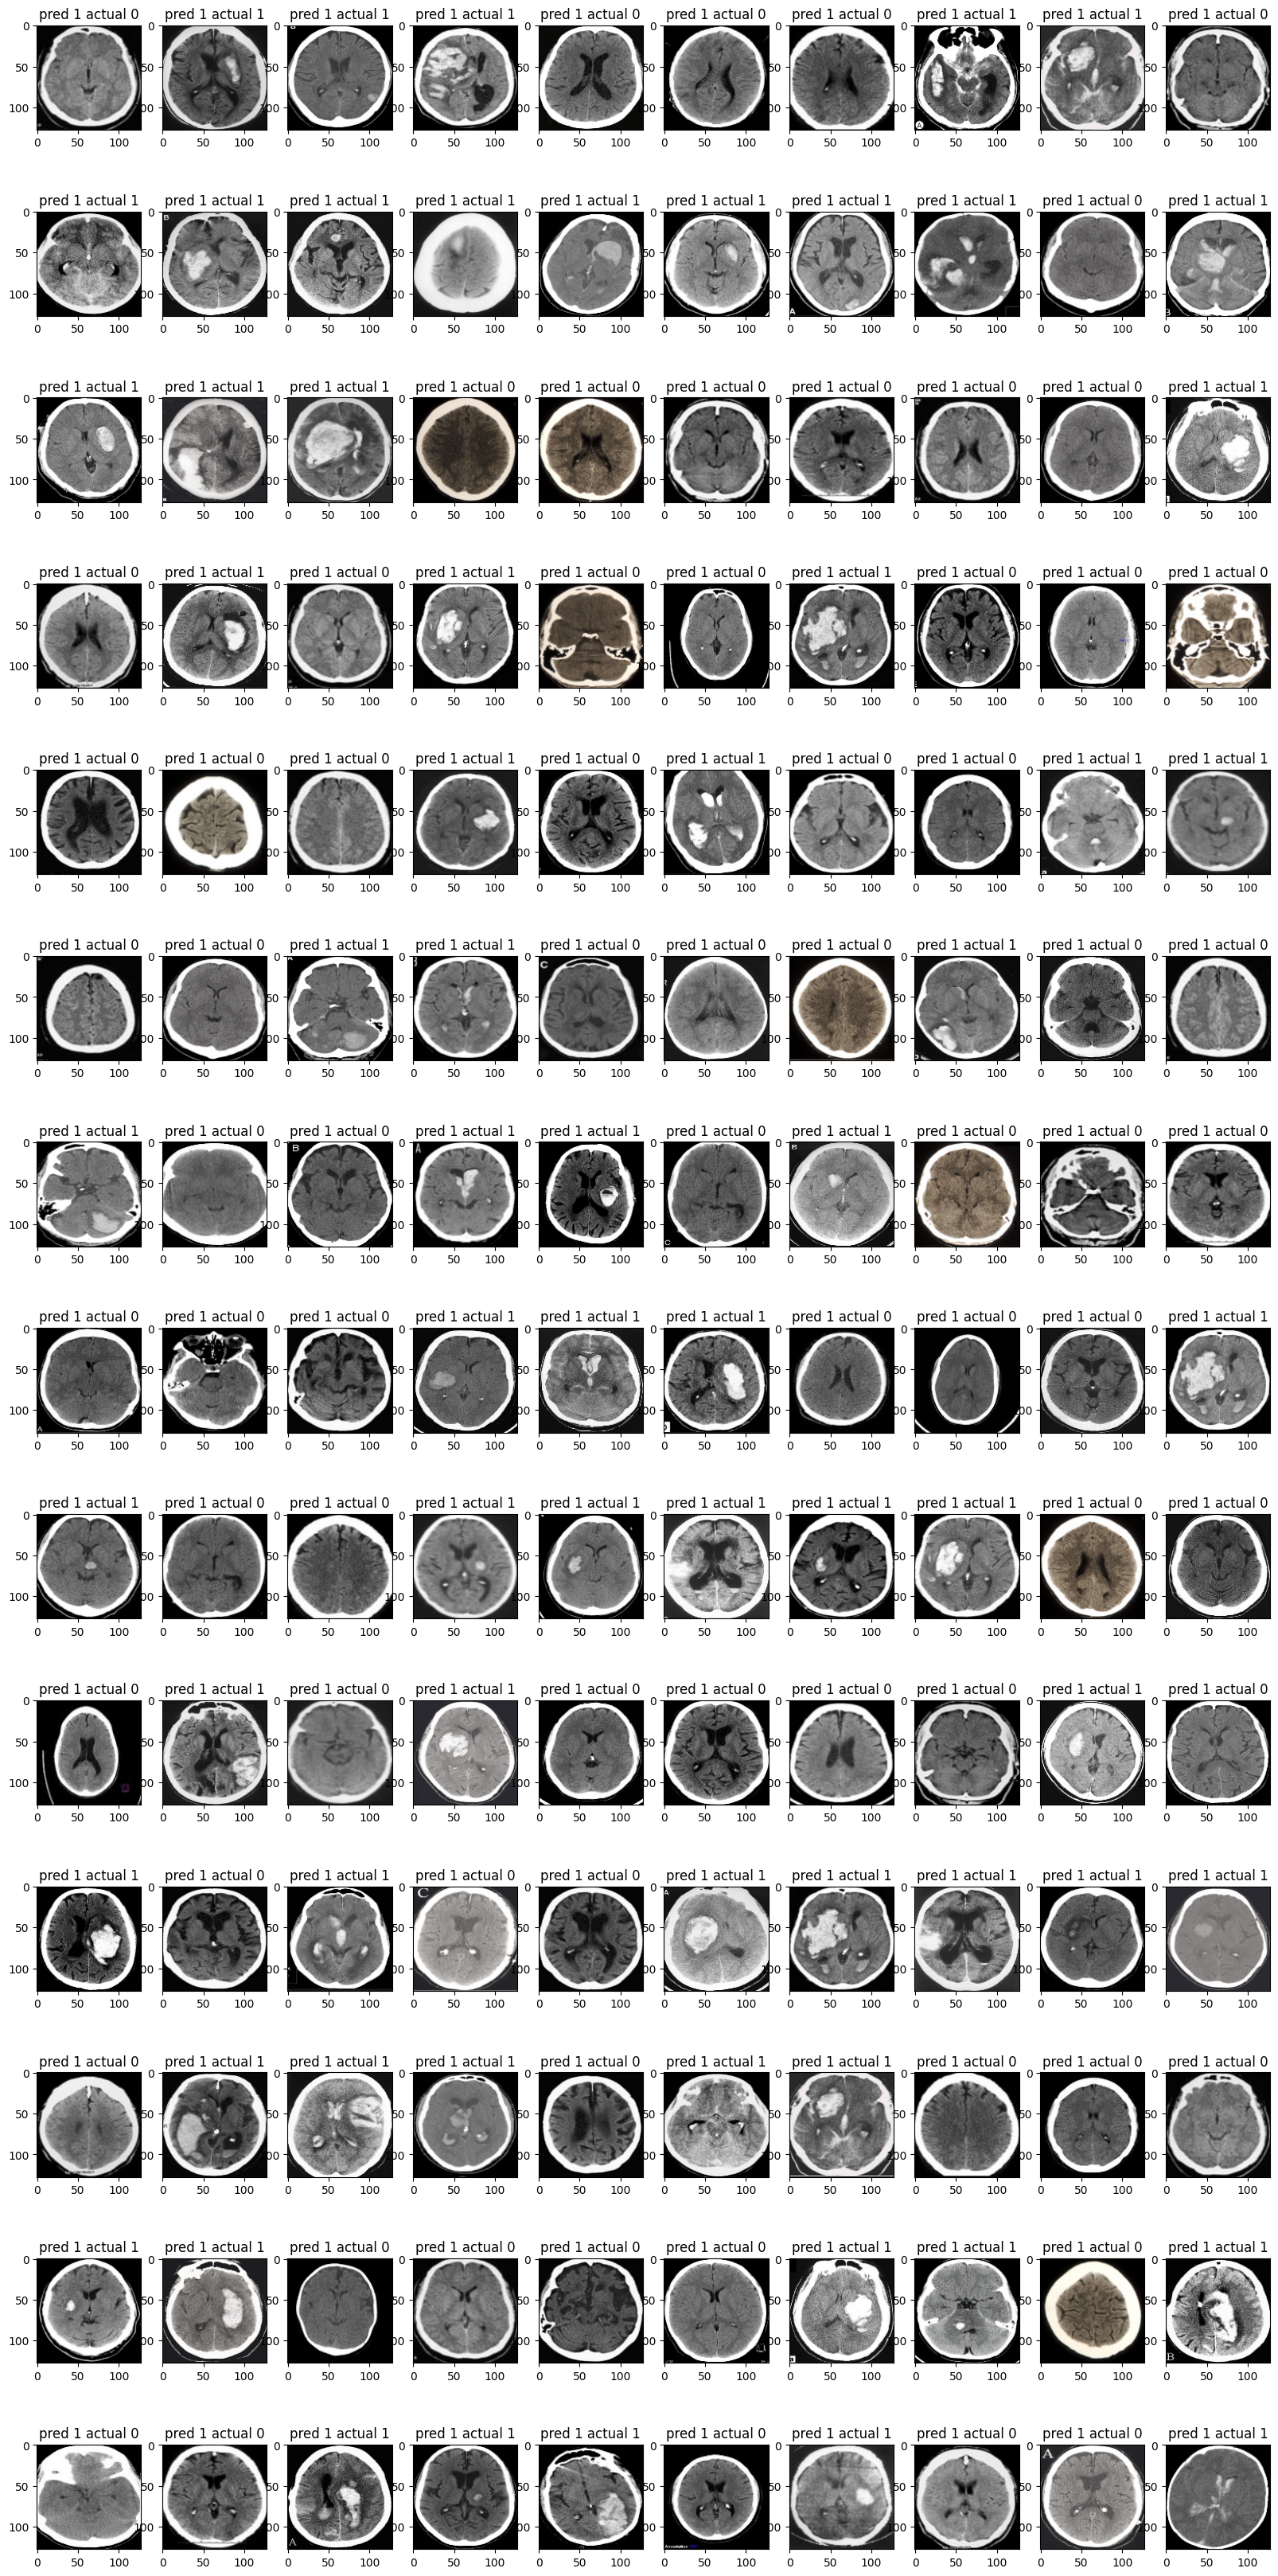

In [39]:
check_accuracy(model, X_dev/255.0, Y_dev, True)

In [24]:
Y_val

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

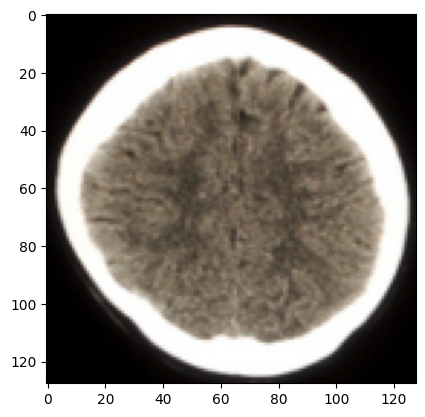

In [29]:
plt.imshow(X_val[0]/255.)

In [38]:
Y_dev

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1])